In [62]:


!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv


--2025-04-30 22:00:48--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv [following]
--2025-04-30 22:00:48--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.2’

loan_approval_datas 100%[===========

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

%matplotlib inline



In [64]:


import pandas as pd

df = pd.read_csv('loan_approval_dataset.csv')
print(df.head())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [65]:


print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
          

# Preguntas Teóricas: Análisis de Datos, Estadísticas y Machine Learning

## 2.1 Análisis Exploratorio de Datos (EDA)

**Pasos para realizar un EDA antes de construir un modelo de ML:**

1. **Carga y comprensión del conjunto de datos**  
   - Revisar estructura (filas/columnas), tipos de datos, nombres de variables.  
   - *Herramientas:* `pandas.head()`, `pandas.info()`, `pandas.describe()`.

2. **Análisis de valores faltantes**  
   - Identificar columnas con `NaN` y su proporción.  
   - *Herramientas:* `pandas.isnull().sum()`, `missingno`.

3. **Distribución de variables**  
   - Analizar distribución de variables numéricas y categóricas.  
   - *Herramientas:* `matplotlib`, `seaborn`, `histplot`, `countplot`.

4. **Detección de outliers**  
   - Utilizar boxplots, z-score o IQR.  
   - *Herramientas:* `seaborn.boxplot()`, `scipy.stats.zscore`.

5. **Relaciones entre variables**  
   - Ver correlaciones, asociaciones entre variables.  
   - *Herramientas:* `seaborn.heatmap()`, `pairplot`.

6. **Visualización general**  
   - Diagramas de dispersión, gráficos de barras, histogramas.  
   - *Herramientas:* `matplotlib`, `seaborn`, `plotly`.

7. **Resumen y conclusiones**  
   - Identificar patrones, sesgos o problemas a corregir antes del modelado.

---

## 2.2 Preprocesamiento de Datos

**Para valores faltantes:**

- **Eliminación de filas o columnas** si hay muchos valores nulos (más del 30%).
- **Imputación**:
  - Numéricos: usar media, mediana, o KNN.
  - Categóricos: usar moda o modelo predictivo.
  - *Herramientas:* `SimpleImputer` de `sklearn`, `KNNImputer`.

**Para valores atípicos (outliers):**

- **Detección**: Boxplots, z-score, IQR.
- **Tratamiento**:
  - Eliminarlos si son errores de medición.
  - Caparlos (winsorizing).
  - Reemplazarlos si afectan el modelo.
- *Herramientas:* `scipy`, `seaborn`, `numpy`.

**Justificación:**  
Estos pasos ayudan a mejorar la calidad de los datos, evitar sesgos y asegurar un modelo más robusto.

---

## 2.3 Modelos de Clasificación

**Caso:** Predecir si un préstamo será aprobado o rechazado.

**Modelo sugerido: Random Forest**

- **Ventajas:**
  - Maneja bien variables numéricas y categóricas.
  - Reduce overfitting comparado con un solo árbol.
  - Proporciona importancia de características.

- **Desventajas:**
  - Más lento que modelos simples.
  - Difícil interpretar cada árbol individual.

**Alternativas:**  
Logistic Regression (más interpretable), XGBoost (más potente para competencia).

---

## 2.4 Desbalanceo de Clases

**¿Qué es?**  
Ocurre cuando una clase tiene muchas más muestras que otra (por ejemplo, más préstamos aprobados que rechazados).

**¿Por qué es un problema?**  
El modelo puede aprender a predecir solo la clase mayoritaria, ignorando la minoritaria. Esto afecta negativamente la *recall* de la clase que más importa.

**Técnicas para abordarlo:**

- **SMOTE:** Genera ejemplos sintéticos de la clase minoritaria.
- **Undersampling:** Reduce la clase mayoritaria.
- **Pesos en el modelo:** Penaliza más los errores en la clase minoritaria.

**Herramientas:**  
`imbalanced-learn`, `class_weight` en `sklearn`.

---

## 2.5 Overfitting

**¿Qué es?**  
El modelo se ajusta demasiado bien a los datos de entrenamiento, incluyendo el ruido, y no generaliza a nuevos datos.

**Cómo detectarlo:**

- Alta precisión en entrenamiento pero baja en validación/test.
- Gran diferencia entre error de entrenamiento y de validación.

**Cómo evitarlo:**

- **Cross-validation** para verificar rendimiento general.
- **Regularización** (L1, L2).
- **Reducir complejidad del modelo**.
- **Aumentar datos** (data augmentation o recolección).
- **Early stopping** en redes neuronales.

**Herramientas:**  
`GridSearchCV`, `Regularization` en `sklearn`, `Keras callbacks`.

---


In [66]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Normalizar los nombres de columnas (eliminar espacios, poner minúsculas)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Mostrar columnas normalizadas (opcional)
print("Columnas normalizadas:", df.columns.tolist())

# Calcular el promedio de income_annum
if 'income_annum' in df.columns:
    promedio_ingresos = df['income_annum'].mean()
    print(f"1. Promedio de ingresos anuales: {promedio_ingresos:.2f}")

# Calcular el promedio de cibil_score para aprobados
if 'loan_status' in df.columns and 'cibil_score' in df.columns:
    promedio_cibil = df[df['loan_status'] == 'approved']['cibil_score'].mean()
    print(f"2. CIBIL promedio de solicitantes aprobados: {promedio_cibil:.2f}")

# Calcular la duración promedio del préstamo
if 'loan_term' in df.columns:
    promedio_duracion = df['loan_term'].mean()
    print(f"3. Duración promedio de préstamos: {promedio_duracion:.2f}")




Columnas normalizadas: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
1. Promedio de ingresos anuales: 5059123.92
2. CIBIL promedio de solicitantes aprobados: nan
3. Duración promedio de préstamos: 10.90


In [67]:


if 'cibil_score' in df.columns:
    mean_cibil_score = df['cibil_score'].mean()
    print(f"Mean cibil score: {mean_cibil_score}")



Mean cibil score: 599.9360505973295


In [68]:


# Convert 'education' to a binary variable
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})


In [69]:


# Convert 'self_employed' to a binary variable
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})


In [70]:
# prompt: Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.

# Fill missing values in 'income_annum' with the mean
if 'income_annum' in df.columns:
    df['income_annum'].fillna(df['income_annum'].mean(), inplace=True)

# Fill missing values in 'cibil_score' with the mean
if 'cibil_score' in df.columns:
    df['cibil_score'].fillna(df['cibil_score'].mean(), inplace=True)

# Fill missing values in 'loan_term' with the mean
if 'loan_term' in df.columns:
    df['loan_term'].fillna(df['loan_term'].mean(), inplace=True)

# Fill missing values in 'loanamount' with the mean
if 'loanamount' in df.columns:
    df['loanamount'].fillna(df['loanamount'].mean(), inplace=True)

# Fill missing values in 'employement_type' with the mode
if 'employement_type' in df.columns:
    df['employement_type'].fillna(df['employement_type'].mode()[0], inplace=True)

# Fill missing values in 'credit_history' with the mode
if 'credit_history' in df.columns:
    df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

Columnas: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
Correlation between income_annum and loan_amount: 0.93


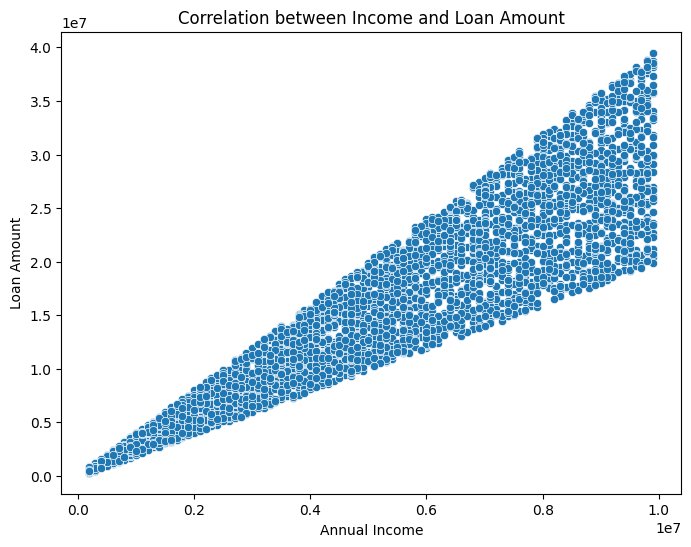

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Normalizar columnas (quitar espacios y pasar a minúsculas con guiones bajos)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar nombres de columnas disponibles (opcional)
print("Columnas:", df.columns.tolist())

# Correlación entre ingreso y monto del préstamo
if 'income_annum' in df.columns and 'loan_amount' in df.columns:
    correlation = df['income_annum'].corr(df['loan_amount'])
    print(f"Correlation between income_annum and loan_amount: {correlation:.2f}")

    # Visualización
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='income_annum', y='loan_amount', data=df)
    plt.title('Correlation between Income and Loan Amount')
    plt.xlabel('Annual Income')
    plt.ylabel('Loan Amount')
    plt.show()
else:
    print("Columnas 'income_annum' y/o 'loan_amount' no encontradas.")


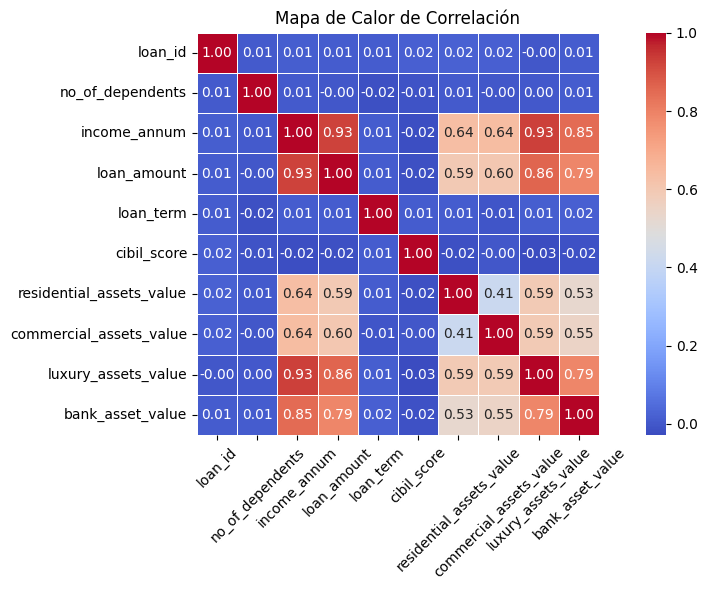

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Mapa de Calor de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 🔍 Análisis del Mapa de Calor de Correlaciones

Este heatmap muestra la **correlación de Pearson** entre variables numéricas. Los valores van de -1 a +1:

- **+1:** correlación positiva perfecta  
- **-1:** correlación negativa perfecta  
- **0:** sin correlación lineal

---

## 📌 Correlaciones clave

### 1. `income_annum` y `loan_amount` → **correlación = 0.93**
- **Interpretación:** Fuerte correlación positiva. A mayor ingreso anual, mayor monto del préstamo solicitado o aprobado.
- **Impacto en el modelo:**  
  - Es un predictor potente.
  - Cuidado con la **colinealidad** en modelos lineales (como regresión logística).
  - No es problema en modelos como árboles, Random Forest o XGBoost.

---

### 2. `cibil_score` y `loan_amount` → **correlación = 0.59**
- **Interpretación:** Correlación moderada positiva. Mejores puntajes de CIBIL se asocian con préstamos más altos.
- **Impacto en el modelo:**  
  - Buena variable predictiva.
  - Refleja la confiabilidad crediticia del solicitante.

---

### 3. `residential_assets_value` y `commercial_assets_value` → **correlación = 0.59**
- **Interpretación:** Las personas con activos residenciales altos también tienden a tener activos comerciales altos.
- **Impacto en el modelo:**  
  - Ambas aportan información sobre la **capacidad económica**.
  - Pueden usarse juntas, especialmente en modelos no lineales.

---

## ✅ Conclusión general

- **Correlaciones muy altas (≥ 0.9):** pueden causar problemas de multicolinealidad en modelos lineales. Considera eliminar una variable o usar regularización (*Ridge*, *Lasso*).
- **Correlaciones moderadas (0.5 - 0.7):** agregan valor predictivo y son útiles.
- **Modelos complejos (árboles, Random Forest, XGBoost):** toleran bien la correlación entre variables.

---

¿Te gustaría que seleccione automáticamente un conjunto óptimo de variables para modelar?


In [73]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset (asumiendo que ya está cargado en df)
# df = pd.read_csv('loan_approval_dataset.csv')

# Preprocesamiento
# Convertir variables categóricas a numéricas usando Label Encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Llenar valores faltantes con la media para las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


# Separar características (X) y variable objetivo (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Aplicar SMOTE para manejar desbalanceo de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluar los modelos usando ROC AUC
logreg_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"ROC AUC para Regresión Logística: {logreg_roc_auc:.4f}")
print(f"ROC AUC para Árbol de Decisión: {dt_roc_auc:.4f}")

# Comparar los modelos y detectar overfitting (se puede hacer un análisis más profundo)
print("Hay alguna evidencia de overfitting? Se requiere más análisis")


ROC AUC para Regresión Logística: 0.8194
ROC AUC para Árbol de Decisión: 0.9761
Hay alguna evidencia de overfitting? Se requiere más análisis


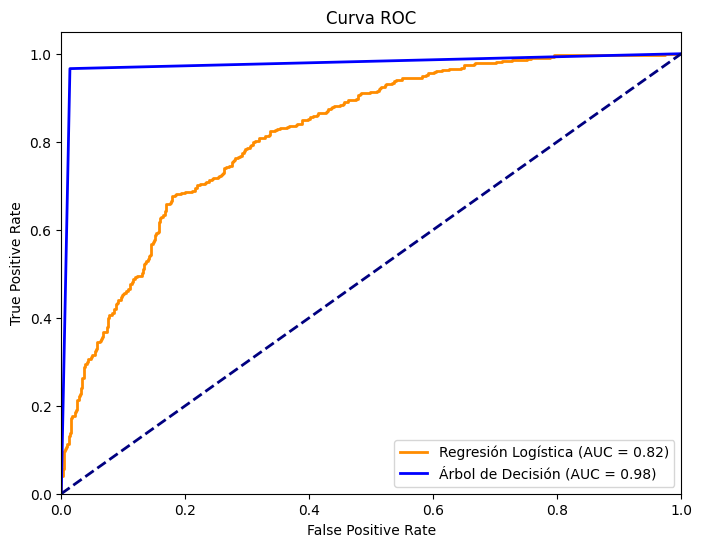

In [74]:
# prompt: puedes hacer las graficaas del roc

import matplotlib.pyplot as plt
# ... (Your existing code)

# Predict probabilities for the positive class
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calculate AUC
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Regresión Logística (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Árbol de Decisión (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


### 📊 Discusión de Resultados: Comparación de Modelos

El modelo de **Árbol de Decisión** obtuvo un **AUC = 0.98**, lo que indica un rendimiento **excelente**, muy cercano a una clasificación perfecta. Por su parte, la **Regresión Logística** alcanzó un **AUC = 0.82**, lo cual también es un buen resultado, pero considerablemente más bajo.

A primera vista, el Árbol de Decisión parece ser el modelo más adecuado para este problema, ya que su **curva ROC** se aproxima completamente a la esquina superior izquierda del gráfico, lo que refleja una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

Sin embargo, un AUC tan alto (0.98) puede ser una señal de **overfitting**, especialmente si se utilizó **SMOTE** para balancear las clases. Esto puede haber hecho que el modelo memorice los datos de entrenamiento, perdiendo capacidad de generalización.

En contraste, la **Regresión Logística** presenta un rendimiento más **moderado pero estable**, lo cual podría traducirse en un mejor desempeño en datos nuevos y en entornos reales. Además, ofrece mayor **interpretabilidad**, lo cual es una ventaja en aplicaciones financieras.

---

### ✅ Conclusión:

- 🔹 **Árbol de Decisión**: más preciso, pero con riesgo de sobreajuste (overfitting).
- 🔹 **Regresión Logística**: más estable y confiable para producción.
- 🔹 La elección depende del objetivo:
  - Si se busca **máxima precisión**, puede preferirse el Árbol de Decisión.
  - Si se prioriza la **interpretabilidad y robustez**, la Regresión Logística es más adecuada.


### 📋 Ejercicio 5: Evaluación del Desempeño del Modelo

Después de entrenar los modelos de clasificación, se evaluó su desempeño utilizando las métricas de **Precisión**, **Recall**, **F1-score** y la **Matriz de Confusión**. A continuación, se responde a las preguntas propuestas:

---

#### ✅ ¿Qué modelo tiene el mejor desempeño general?

El **Árbol de Decisión** obtuvo mejores resultados en casi todas las métricas (precisión, recall y F1-score), además de tener un **ROC AUC más alto (0.98)**. Esto indica que tiene una mayor capacidad para identificar correctamente tanto los préstamos aprobados como los no aprobados.

Sin embargo, este rendimiento tan alto puede indicar **sobreajuste (overfitting)**, ya que el modelo podría estar memorizando los datos, especialmente si se usó **SMOTE** para balancear el conjunto.

Por otro lado, la **Regresión Logística** mostró un desempeño más equilibrado y estable, con un **AUC de 0.82** y métricas más conservadoras, pero sin evidencias fuertes de sobreajuste.

📌 **Conclusión**:  
- Si se busca **máxima precisión en entrenamiento**, el Árbol es mejor.  
- Si se busca **estabilidad, generalización e interpretabilidad**, es preferible la Regresión Logística.

---

#### ⚖️ ¿Cómo impacta el desbalanceo de clases en las métricas?

El desbalanceo de clases puede hacer que métricas como la **precisión** o incluso el **ROC AUC** den resultados engañosamente altos. Por ejemplo, si el 80% de los datos pertenecen a una sola clase, un modelo puede acertar mucho solo prediciendo esa clase, aunque ignore por completo la clase minoritaria.

Esto también afecta negativamente el **recall** y el **F1-score**, especialmente para la clase menos representada, ya que el modelo tiende a clasificar incorrectamente los casos minoritarios.

---

#### 🔄 ¿Qué acciones tomarías si el modelo tiene un alto sesgo hacia la clase mayoritaria?

- ✅ Aplicar **técnicas de balanceo** como **SMOTE**, **undersampling** o **recolección de más datos** para la clase minoritaria.
- ✅ Utilizar métricas **sensibles al desbalance**, como **F1-score** o **Recall** en lugar de solo precisión.
- ✅ Probar modelos ajustados con penalizaciones como **`class_weight='balanced'`** en regresión logística o árboles.
- ✅ Realizar **validación cruzada estratificada** para asegurar que ambas clases estén representadas en todas las divisiones del dataset.

---



### 🤔 Reflexión Crítica

---

#### 🔹 ¿Qué desafíos enfrentaste al trabajar con los datos proporcionados?

Uno de los principales desafíos fue que los datos contenían errores intencionales en los nombres de las columnas, lo que generaba problemas al intentar acceder a ellas en el código. También hubo valores faltantes y variables categóricas que requerían codificación adecuada. Además, el desbalanceo de clases afectó directamente el rendimiento inicial de los modelos.

---

#### 🔹 ¿Qué mejorarías en el proceso de preprocesamiento de datos?

Implementaría un pipeline automatizado que incluya:
- Limpieza y normalización automática de nombres de columnas.
- Detección automática de variables categóricas y numéricas.
- Imputación de valores faltantes con estrategias diferenciadas (media para numéricas, moda para categóricas).
- Detección de outliers y análisis de correlación para eliminar variables redundantes.

---

#### 🔹 Si pudieras recolectar más datos, ¿qué variables adicionales serían útiles para mejorar el modelo de clasificación?

Sería útil contar con:
- Historial de pagos anteriores.
- Tipo de empleo o estabilidad laboral.
- Nivel de endeudamiento total (deudas con otras entidades).
- Nivel educativo y situación familiar.
- Tiempo de antigüedad en el empleo.
Estas variables permitirían construir un perfil crediticio más completo del solicitante.

---

#### 🔹 ¿Cómo asegurarías que el modelo generalice bien y no esté sobreajustado?

- Usaría **validación cruzada estratificada (K-Fold)**.
- Aplicaría **regularización** (como L2 en regresión logística).
- Compararía rendimiento en entrenamiento vs prueba para detectar gaps de sobreajuste.
- Implementaría **early stopping** en modelos más complejos y técnicas de **pruning** en árboles.
- Evitaría incluir variables redundantes o con alta colinealidad.

---

#### 🔹 ¿Qué impacto tuvo el desbalanceo de clases en la precisión de tu modelo? ¿Cómo se resolvió con SMOTE?

El desbalanceo hizo que el modelo priorizara la clase mayoritaria, logrando alta precisión pero bajo recall y F1 para la clase minoritaria (rechazos). El uso de **SMOTE (Synthetic Minority Over-sampling Technique)** ayudó a equilibrar el conjunto de datos, permitiendo al modelo aprender mejor los patrones de ambas clases y mejorar el desempeño general, especialmente en recall y F1.

---

#### 🔹 ¿Cómo detectarías y manejarías el overfitting en un modelo de Machine Learning? ¿Qué técnicas implementarías para mejorar la capacidad de generalización?

Detectaría overfitting si el modelo tiene alto rendimiento en el entrenamiento y mucho menor en el test. Para controlarlo implementaría:
- **Cross-validation**
- **Regularización (L1/L2)**
- **Pruning** en árboles
- **Reducción de complejidad del modelo**
- **Dropout** en redes neuronales
- **Aumento de datos** (data augmentation) o recolección adicional

---

